In [32]:
import pandas as pd
import numpy as np


#Задание 1
#Импортируйте библиотеки pandas и numpy.
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
#Создайте датафреймы X и y из этих данных.
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
#Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression 
#из модуля sklearn.linear_model.
#Обучите модель на тренировочных данных (используйте все признаки)
#и сделайте предсказание на тестовых.
#Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [33]:
data_boston = boston.data
data_boston.shape

(506, 13)

In [34]:
target = boston.target

In [35]:
X = pd.DataFrame(data_boston, columns=boston.feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
y = pd.DataFrame(target, columns=['price'])

y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()


In [39]:
Lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = Lr.predict(X_test) 

In [41]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred': y_pred.flatten()},
                          columns=['y_test','y_pred'])


In [42]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error(y_test, y_pred)

3.1627098714573783

In [44]:
mean_squared_error(y_test, y_pred)

21.517444231176995

In [45]:
r2_score(y_test, y_pred)

0.711226005748496

In [78]:
#Задание 2
#Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
#Сделайте агрумент n_estimators равным 1000,
#max_depth должен быть равен 12 и random_state сделайте равным 42.
#Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
#но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
#чтобы получить из датафрейма одномерный массив Numpy,
#так как для класса RandomForestRegressor в данном методе для аргумента 
#y предпочтительно применение массивов вместо датафрейма.
#Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом 
#из предыдущего задания.
#Напишите в комментариях к коду, какая модель в данном случае работает лучше.


from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train.values[:,0])

clf = RandomForestClassifier(max_depth=12, random_state=42, n_estimators=1000)
clf.fit(X_train, encoded)

y_pred_tree = clf.predict(X_test)

In [79]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred_tree': y_pred_tree.flatten()},
                          columns=['y_test','y_pred_tree'])
check_test.head(10)

,y_test,y_pred_tree
173,23.6,106
274,32.4,157
491,13.6,44
72,22.8,97
452,16.1,42
76,20.0,97
316,17.8,80
140,14.0,30
471,19.6,110
500,16.8,93


In [80]:
r2_score(y_test, y_pred_tree)

-83.9610175608203

In [81]:
mean_squared_error(y_test, y_pred_tree)

6330.708421052632

In [82]:
mean_absolute_error(y_test, y_pred_tree)

67.83552631578948

In [ ]:
#В данном случае линейная регрессия точнее описывает изменения цены на дома в Бостоне, 
#так как коэффициент детерминации достаточно высокий и равен 0,71, 
#в сравнении с аналогичным коэффициентом для ансамбля деревьев равному -83,96.

In [101]:
#* Задание 3
#Вызовите документацию для класса RandomForestRegressor,
#найдите информацию об атрибуте feature_importances_.
#С помощью этого атрибута найдите сумму всех показателей важности,
#установите, какие два признака показывают наибольшую важность.


from sklearn.ensemble import RandomForestRegressor

?RandomForestRegressor.feature_importances_



In [87]:
clf.feature_importances_

array([0.12166818, 0.02473621, 0.05128165, 0.01202538, 0.07536053,
       0.13070662, 0.10968563, 0.11341674, 0.03407865, 0.04816496,
       0.04844077, 0.09674667, 0.133688  ])

In [88]:
sum(clf.feature_importances_)

1.0

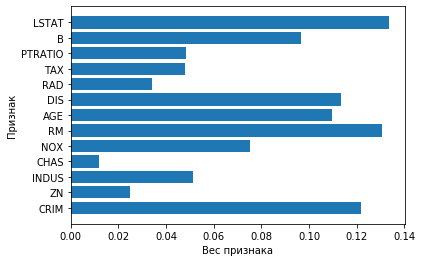

In [90]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

plt.barh(boston.feature_names, clf.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [ ]:
# Наибольшую важность показывают признаки: LSTAT и RM

In [109]:
#*Задание 4
#В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию
#по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для 
#этого датасета мы будем решать задачу классификации - будем определять,какие из 
#транзакциции по кредитной карте являются мошенническими.Данный датасет сильно
#несбалансирован (так как случаи мошенничества относительно редки),так что
#применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC,
#то есть площадь под кривой ROC.
#Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
#Загрузите датасет creditcard.csv и создайте датафрейм df.
#С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка
#несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли
#в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
#pd.options.display.max_columns = 100.
#Просмотрите первые 10 строк датафрейма df.
#Создайте датафрейм X из датафрейма df, исключив столбец Class.
#Создайте объект Series под названием y из столбца Class.
#Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
#используя аргументы: test_size=0.3, random_state=100, stratify=y.
#У вас должны получиться объекты X_train, X_test, y_train и y_test.
#Просмотрите информацию о их форме.
#Для поиска по сетке параметров задайте такие параметры:
#parameters = [{'n_estimators': [10, 15],
#'max_features': np.arange(3, 5),
#'max_depth': np.arange(4, 7)}]
#Создайте модель GridSearchCV со следующими аргументами:
#estimator=RandomForestClassifier(random_state=100),
#param_grid=parameters,
#scoring='roc_auc',
#cv=3.
#Обучите модель на тренировочном наборе данных (может занять несколько минут).
#Просмотрите параметры лучшей модели с помощью атрибута best_params_.
#Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
#Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
#Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("creditcard.csv") 

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [110]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [112]:
pd.options.display.max_columns = 100

In [113]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [116]:
X = df.drop(['Class'], axis=1)

In [117]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [120]:
y = df['Class']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)


In [122]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,94810.339675,0.002243,-0.001196,0.000810,0.001849,0.002252,0.000860,-0.002396,-0.002061,-0.001636,-0.002549,-0.001743,0.001404,-0.001305,0.000040,0.000068,0.000483,0.001630,0.000303,-0.000020,-0.000126,-0.000035,-0.000532,-0.001047,-0.000690,0.000685,-0.000254,0.000120,0.000314,88.139797
std,47474.327394,1.957553,1.652392,1.512832,1.417121,1.365517,1.325449,1.218740,1.208945,1.096996,1.082398,1.018143,0.994797,0.995828,0.955804,0.915469,0.871720,0.841630,0.838102,0.814197,0.760362,0.746103,0.726956,0.625258,0.606662,0.521484,0.481503,0.396735,0.329149,242.462066
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.568390,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-23.815636,-9.498746,-7.213527,-25.222345,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.895244,-9.617915,0.000000
25%,54173.250000,-0.917434,-0.598699,-0.888159,-0.849660,-0.691944,-0.767172,-0.554808,-0.208512,-0.644613,-0.537343,-0.762321,-0.404682,-0.650200,-0.425083,-0.582549,-0.468477,-0.483477,-0.498889,-0.457060,-0.211651,-0.228272,-0.542095,-0.162000,-0.355339,-0.316379,-0.326857,-0.070775,-0.052928,5.740000
50%,84654.500000,0.020646,0.064743,0.181180,-0.019098,-0.055280,-0.271647,0.039937,0.022900,-0.051257,-0.093973,-0.034723,0.139429,-0.015088,0.050493,0.048497,0.065720,-0.064986,-0.002910,0.004455,-0.062606,-0.029201,0.006807,-0.011571,0.040565,0.017818,-0.052509,0.001418,0.011377,22.115000
75%,139366.250000,1.314864,0.801737,1.029009,0.746461,0.612686,0.402208,0.570538,0.328388,0.596602,0.453867,0.737656,0.619286,0.662928,0.491942,0.649400,0.522746,0.401246,0.501645,0.457607,0.133509,0.186293,0.527498,0.147256,0.439859,0.351807,0.240816,0.091009,0.077949,77.340000
max,172792.000000,2.454930,22.057729,4.226108,16.715537,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,12.018913,7.848392,4.465413,10.526766,5.825654,6.442798,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000


In [129]:
X_train.shape


(199364, 30)

In [130]:
X_test.shape


(85443, 30)

In [131]:
y_train.shape


(199364,)

In [132]:
y_test.shape

(85443,)

In [133]:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]


In [134]:
model_GridSearchCV = GridSearchCV(
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3,
)

In [135]:
model_GridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [136]:
model_GridSearchCV.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [141]:
prob_arr = model_GridSearchCV.predict_proba(X_test)
prob_arr

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

In [155]:
y_pred_proba = prob_arr[:, 1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [156]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [158]:

prob_arr_tr = model_GridSearchCV.predict_proba(X_train)
prob_arr_tr

array([[9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99717846e-01, 2.82154033e-04],
       [9.99737336e-01, 2.62663815e-04]])

In [159]:
y_pred_proba_tr = prob_arr_tr[:, 1]
y_pred_proba_tr

array([0.00028215, 0.00028215, 0.00028215, ..., 0.00028215, 0.00028215,
       0.00026266])

In [160]:
roc_auc_score(y_train, y_pred_proba_tr)

0.9703527882554751